In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import association_rules


In [6]:
data = pd.read_csv('dataset.csv')
print(data)

     Index Number  Rank                                Country/Economy  \
0              NaN  NaN                                            NaN   
1              0.0    1                                  United States   
2              1.0    2                                          China   
3              2.0    3                                          Japan   
4              3.0    4                                        Germany   
..             ...  ...                                            ...   
226          225.0    -  Saint Helena, Ascension, and Tristan da Cunha   
227          226.0    -                                        Tokelau   
228          227.0    -                       Turks and Caicos Islands   
229          228.0    -                              Wallis and Futuna   
230          229.0    -                                 Western Sahara   

    GDP (millions of $) Agriculture GDP Unnamed: 5 Unnamed: 6 Industry  \
0                   NaN             G

In [3]:
# Convert GDP Category into one-hot encoding
# Assumed that GDP Category is stored under 'GDP (millions of $)' or some equivalent column name
# You need to categorize the GDP values into categories like 'Low', 'Medium', 'High', 'Very High'.
# Here we simulate 'GDP_Category' using GDP column for simplicity.
# Assuming you categorize GDP manually or have a column 'GDP_Category' available.


In [16]:
# Step 1: Convert GDP column to numeric
data['GDP (millions of $)'] = pd.to_numeric(data['GDP (millions of $)'], errors='coerce')

# Step 2: Define the GDP categorization function
def categorize_gdp(gdp_value):
    if gdp_value < 50000:
        return 'Low'
    elif 50000 <= gdp_value < 200000:
        return 'Medium'
    elif 200000 <= gdp_value < 500000:
        return 'High'
    else:
        return 'Very High'

# Step 3: Apply the function to create a new 'GDP_Category' column
data['GDP_Category'] = data['GDP (millions of $)'].apply(categorize_gdp)

# Step 4: Perform one-hot encoding on the GDP category
oht = pd.get_dummies(data['GDP_Category'])

# Optionally, attach the encoded columns back to your dataframe
data = pd.concat([data, oht], axis=1)


In [17]:
# ================================================================
# 1. FREQUENT ITEMSETS
# ================================================================
# Q1: What are the most common GDP categories?
frequent_itemsets = apriori(oht, min_support=0.2, use_colnames=True)
print("\n[Q1] Frequent GDP Categories:")
print(frequent_itemsets)

# Q2: Which GDP categories appear together frequently?
print("\n[Q2] Frequent combinations:")
print(frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)])

# Q3: Which GDP category is the most dominant?
print("\n[Q3] Dominant category by support:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(1))

# Q4: Are there any rare GDP categories below 10%?
print("\n[Q4] Rare categories (support < 0.1):")
print(frequent_itemsets[frequent_itemsets['support'] < 0.1])

# Q5: Total number of frequent itemsets found
print("\n[Q5] Total Frequent Itemsets:", len(frequent_itemsets))


[Q1] Frequent GDP Categories:
    support itemsets
0  0.601732    (Low)

[Q2] Frequent combinations:
Empty DataFrame
Columns: [support, itemsets]
Index: []

[Q3] Dominant category by support:
    support itemsets
0  0.601732    (Low)

[Q4] Rare categories (support < 0.1):
Empty DataFrame
Columns: [support, itemsets]
Index: []

[Q5] Total Frequent Itemsets: 1


In [18]:
# ================================================================
# 2. CLOSED ITEMSETS
# ================================================================
# Q6: What are the closed frequent itemsets?
freq_closed = fpmax(oht, min_support=0.2, use_colnames=True)
print("\n[Q6] Closed Frequent Itemsets:")
print(freq_closed)

# Q7: What itemsets are closed but not maximal?
closed_diff = pd.concat([frequent_itemsets, freq_closed]).drop_duplicates(keep=False)
print("\n[Q7] Closed but not maximal:")
print(closed_diff)

# Q8: What is the max support among closed itemsets?
print("\n[Q8] Max support among closed itemsets:")
print(freq_closed.sort_values(by='support', ascending=False).head(1))



[Q6] Closed Frequent Itemsets:
    support itemsets
0  0.601732    (Low)

[Q7] Closed but not maximal:
Empty DataFrame
Columns: [support, itemsets]
Index: []

[Q8] Max support among closed itemsets:
    support itemsets
0  0.601732    (Low)


In [19]:
# ================================================================
# 3. ASSOCIATION RULES
# ================================================================
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Q9: What rules have high confidence?
print("\n[Q9] High confidence rules:")
print(rules.sort_values(by='confidence', ascending=False).head(5))

# Q10: Which rules have high lift?
print("\n[Q10] Rules with highest lift:")
print(rules.sort_values(by='lift', ascending=False).head(5))

# Q11: Any rules that imply 'Very High' GDP category?
print("\n[Q11] Rules implying 'Very High':")
print(rules[rules['consequents'].apply(lambda x: 'Very High' in x)])



[Q9] High confidence rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

[Q10] Rules with highest lift:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

[Q11] Rules implying 'Very High':
Empty DataFrame
Columns: []
Index: []


In [20]:
# ================================================================
# 4. APRIORI ALGORITHM (w/ HASHING THOUGHT)
# ================================================================
# Q12: Can we mine rules faster with hashing?
# (Simulated by reducing dataset size)
small_data = oht.sample(frac=0.5, random_state=42)
small_frequent = apriori(small_data, min_support=0.2, use_colnames=True)
print("\n[Q12] Faster mining on smaller dataset (simulated hashing):")
print(small_frequent)

# Q13: How does result quality differ when hashing simulated?
print("\n[Q13] Loss in patterns due to smaller data:")
print(len(frequent_itemsets) - len(small_frequent))


[Q12] Faster mining on smaller dataset (simulated hashing):
    support itemsets
0  0.594828    (Low)

[Q13] Loss in patterns due to smaller data:
0


In [21]:
# ================================================================
# 5. ASSOCIATION RULE GENERATION
# ================================================================
# Q14: How many rules are generated in total?
print("\n[Q14] Total Rules:", len(rules))

# Q15: What rules have the lowest confidence but high support?
print("\n[Q15] Low confidence, high support:")
print(rules[(rules['confidence'] < 0.8) & (rules['support'] > 0.2)].head())



[Q14] Total Rules: 0

[Q15] Low confidence, high support:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [22]:
# ================================================================
# 6. APRIORI EFFICIENCY IMPROVEMENTS
# ================================================================
# Q16: How does runtime change with lower min_support?
import time
start = time.time()
low_support = apriori(oht, min_support=0.1, use_colnames=True)
end = time.time()
print("\n[Q16] Runtime for lower min_support:", round(end - start, 3), "seconds")


[Q16] Runtime for lower min_support: 0.003 seconds


In [23]:
# ================================================================
# 7. PATTERN-GROWTH (FP-GROWTH)
# ================================================================
fpg = fpgrowth(oht, min_support=0.2, use_colnames=True)
print("\n[Q17] FP-Growth frequent itemsets:")
print(fpg)


# Q18: Is FP-Growth faster than Apriori?
start = time.time()
_ = fpgrowth(oht, min_support=0.1, use_colnames=True)
print("[Q18] FP-Growth on low support runtime:", round(time.time() - start, 3), "seconds")


[Q17] FP-Growth frequent itemsets:
    support itemsets
0  0.601732    (Low)
[Q18] FP-Growth on low support runtime: 0.003 seconds


In [24]:
# ================================================================
# 8. VERTICAL FORMAT MINING (simulated)
# ================================================================
# Q19: What are TIDs for 'High' GDP?
tids = set(data.index[oht['High'] == 1])
print("\n[Q19] TIDs for 'High':", tids)



[Q19] TIDs for 'High': {25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}


In [26]:
# ================================================================
# 9. HIGH UTILITY ITEMSET MINING (simulation)
# ================================================================
# Simulate utility scores
utility = pd.DataFrame({'High': oht['High'] * 3,
                        'Very High': oht['Very High'] * 5,
                        'Medium': oht['Medium'] * 2,
                        'Low': oht['Low'] * 1})

utility['Total_Utility'] = utility.sum(axis=1)
print(oht.columns)


Index(['High', 'Low', 'Medium', 'Very High'], dtype='object')


In [27]:
# Q20: What are top 5 records with highest utility?
print("\n[Q20] Top utility GDP records:")
print(utility.sort_values(by='Total_Utility', ascending=False).head())


[Q20] Top utility GDP records:
   High  Very High  Medium  Low  Total_Utility
0     0          5       0    0              5
1     0          5       0    0              5
2     0          5       0    0              5
3     0          5       0    0              5
4     0          5       0    0              5


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# A

# Apply FP-growth to generate frequent itemsets
fpg = fpgrowth(oht, min_support=0.2, use_colnames=True)

# Display frequent itemsets
print(fpg)


    support itemsets
0  0.601732    (Low)


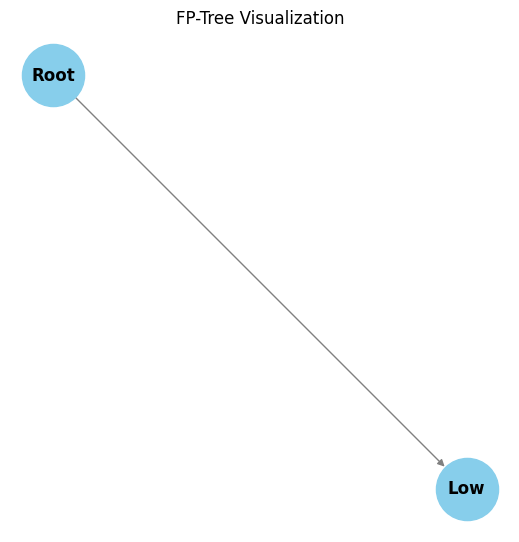

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Helper function to generate FP-Tree structure
def generate_fp_tree(itemsets):
    G = nx.DiGraph()  # Directed graph for FP-tree
    root = 'Root'  # Root of the tree
    G.add_node(root)  # Add the root node
    
    for index, row in itemsets.iterrows():
        path = row['itemsets']
        parent = root
        for item in path:
            if not G.has_edge(parent, item):
                G.add_edge(parent, item)  # Add edge from parent to item
            parent = item
    
    return G

# Generate FP-tree from frequent itemsets
fp_tree = generate_fp_tree(fpg)

# Visualize the FP-tree
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(fp_tree, seed=42)
nx.draw(fp_tree, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("FP-Tree Visualization")
plt.show()


   Agriculture  Industry  Services
0        False     False     False
1         True      True      True
2         True      True      True
3         True      True      True
4         True      True      True

Frequent Itemsets using Apriori:
    support                 itemsets
0  0.567100            (Agriculture)
1  0.696970               (Industry)
2  0.822511               (Services)
3  0.549784  (Agriculture, Industry)
4  0.567100  (Services, Agriculture)

Frequent Itemsets using FP-Growth:
    support                 itemsets
0  0.822511               (Services)
1  0.696970               (Industry)
2  0.567100            (Agriculture)
3  0.692641     (Services, Industry)
4  0.567100  (Services, Agriculture)

Association Rules using Apriori:
     antecedents    consequents  antecedent support  consequent support  \
0  (Agriculture)     (Industry)            0.567100            0.696970   
1     (Industry)  (Agriculture)            0.696970            0.567100   
2     (Services) 

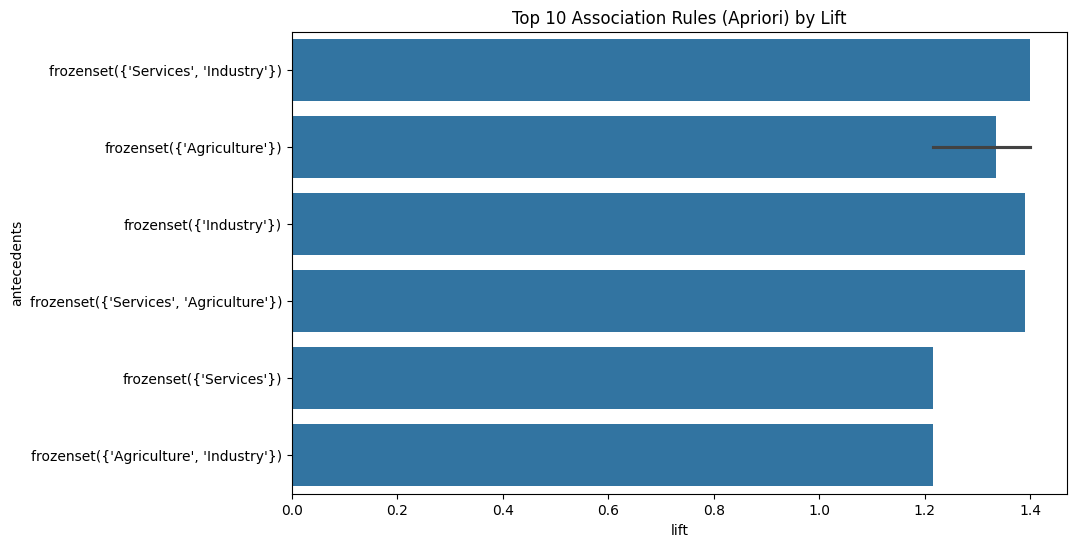

In [31]:
import pandas as pd

# Load your dataset
data = pd.read_csv('dataset.csv')

# Ensure the columns are numeric, coercing errors to NaN
data['Agriculture GDP'] = pd.to_numeric(data['Agriculture GDP'], errors='coerce')
data['Industry'] = pd.to_numeric(data['Industry'], errors='coerce')
data['Services'] = pd.to_numeric(data['Services'], errors='coerce')

# Define a threshold for categorizing GDP values
threshold = 1000

# Create a binary matrix where each column represents a sector, and each row represents a country
basket = pd.DataFrame()

# Creating binary columns for each sector based on whether the GDP is above the threshold
basket['Agriculture'] = data['Agriculture GDP'] > threshold
basket['Industry'] = data['Industry'] > threshold
basket['Services'] = data['Services'] > threshold

# Display the basket dataframe to confirm
print(basket.head())


# Now we can apply Apriori and FP-Growth algorithms to find frequent itemsets.

# Step 3: Perform Apriori algorithm to mine frequent itemsets
frequent_itemsets_apriori = apriori(basket, min_support=0.2, use_colnames=True)

# Step 4: Generate association rules from the frequent itemsets mined by Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Step 5: Perform FP-Growth algorithm to mine frequent itemsets
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.2, use_colnames=True)

# Step 6: Generate association rules from the frequent itemsets mined by FP-Growth
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

# Step 7: Save results to CSV files for further analysis
frequent_itemsets_apriori.to_csv('Frequent_Itemsets_Apriori.csv', index=False)
frequent_itemsets_fpgrowth.to_csv('Frequent_Itemsets_FPGrowth.csv', index=False)
rules_apriori.to_csv('Association_Rules_Apriori.csv', index=False)
rules_fpgrowth.to_csv('Association_Rules_FPGrowth.csv', index=False)

# Step 8: Display the results
print("\nFrequent Itemsets using Apriori:")
print(frequent_itemsets_apriori.head())

print("\nFrequent Itemsets using FP-Growth:")
print(frequent_itemsets_fpgrowth.head())

print("\nAssociation Rules using Apriori:")
print(rules_apriori.head())

print("\nAssociation Rules using FP-Growth:")
print(rules_fpgrowth.head())

# Step 9: Generate a summary report
summary_report = {
    "Apriori_Frequent_Itemsets": frequent_itemsets_apriori.shape[0],
    "FPGrowth_Frequent_Itemsets": frequent_itemsets_fpgrowth.shape[0],
    "Apriori_Association_Rules": rules_apriori.shape[0],
    "FPGrowth_Association_Rules": rules_fpgrowth.shape[0]
}

# Step 10: Display the summary report
print("\nSummary Report:")
for key, value in summary_report.items():
    print(f"{key}: {value}")

# Optional: Visualize the association rules (Top 10 by lift)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 association rules based on lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=rules_apriori.nlargest(10, 'lift'))
plt.title('Top 10 Association Rules (Apriori) by Lift')
plt.show()


C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


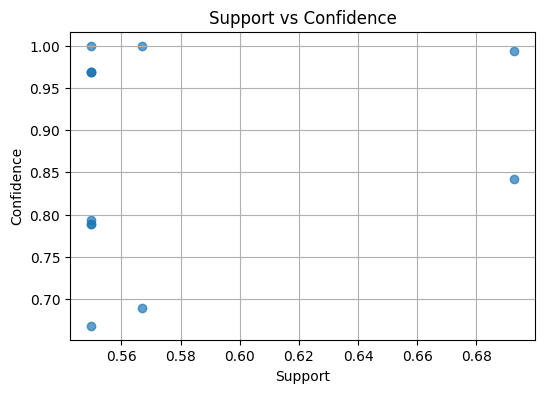

C:\Users\aksha\AppData\Local\Temp\ipykernel_11460\1742610869.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_table['antecedents'] = rules_table['antecedents'].apply(lambda x: ', '.join(list(x)))
C:\Users\aksha\AppData\Local\Temp\ipykernel_11460\1742610869.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_table['consequents'] = rules_table['consequents'].apply(lambda x: ', '.join(list(x)))


,antecedents,consequents,support,confidence,lift
0,Industry,Agriculture,0.549784,0.788820,1.390972
1,Agriculture,Industry,0.549784,0.969466,1.390972
2,Services,Agriculture,0.567100,0.689474,1.215789
3,Agriculture,Services,0.567100,1.000000,1.215789
4,Industry,Services,0.692641,0.993789,1.208238
5,Services,Industry,0.692641,0.842105,1.208238
6,"Industry, Services",Agriculture,0.549784,0.793750,1.399666
7,"Industry, Agriculture",Services,0.549784,1.000000,1.215789
8,"Services, Agriculture",Industry,0.549784,0.969466,1.390972
9,Industry,"Services, Agriculture",0.549784,0.788820,1.390972


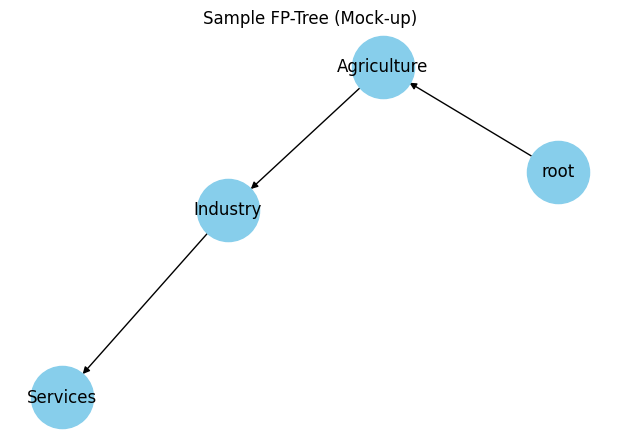

In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
data = pd.read_csv('dataset.csv')

# Convert GDP values to numeric
for col in ['Agriculture GDP', 'Industry', 'Services']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Define threshold
threshold = 1000

# Create binary matrix (basket)
basket = pd.DataFrame()
basket['Agriculture'] = data['Agriculture GDP'] > threshold
basket['Industry'] = data['Industry'] > threshold
basket['Services'] = data['Services'] > threshold

# Ensure boolean values are cast to int
basket = basket.astype(int)

# Run Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 1. Support vs Confidence Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()

# 2. Association Rules Table
rules_table = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_table['antecedents'] = rules_table['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_table['consequents'] = rules_table['consequents'].apply(lambda x: ', '.join(list(x)))
display(rules_table)

# 3. Sample FP-Tree (Simplified Mock Tree just for visualization)
# Build a sample tree based on frequent itemsets
G = nx.DiGraph()

# Add nodes and edges (simplified for visual purposes)
G.add_edge("root", "Agriculture")
G.add_edge("Agriculture", "Industry")
G.add_edge("Industry", "Services")

pos = nx.spring_layout(G)
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, arrows=True)
plt.title("Sample FP-Tree (Mock-up)")
plt.show()


In [13]:
data.columns

Index(['Index Number ', 'Rank', 'Country/Economy', 'GDP (millions of $)',
       'Agriculture GDP', 'Unnamed: 5', 'Unnamed: 6', 'Industry', 'Unnamed: 8',
       'Unnamed: 9', 'Services', 'Unnamed: 11', 'Unnamed: 12', 'Year GDP ',
       'Year Sector'],
      dtype='object')